## Introduction Plot 

### Figure 1 

The aim of this plot is to show: 
- the region being sampled, topography, climatology etc
- Glider tracks, and a sense of scale
- Sampling rates in the vertical and horizontal 

In [1]:
import numpy as np
import xarray as xr

import glidertools as gt
from cmocean import cm as cmo

import gsw

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

import cmocean

import extra_funcs as ef

In [2]:
plt.style.use('seaborn-colorblind')
plt.rcParams['font.size'] = 8

In [3]:
data_dir = '../data/'

data_659 = data_dir+'sg_659_4m_binned.nc'
data_660 = data_dir+'sg_660_4m_binned.nc'

ds_659_z = xr.load_dataset(data_659)
ds_660_z = xr.load_dataset(data_660)

ds_659_z['days'] = ef.datetime2ytd(ds_659_z.time)
ds_660_z['days'] = ef.datetime2ytd(ds_660_z.time)

In [4]:
ds_SSH = xr.open_dataset('../data/SSH_sogos.nc')
ds_SSH = ds_SSH.assign_coords(days = ef.datetime2ytd(ds_SSH.time))

In [5]:
ds_660_time = xr.merge([ef.interp_time(ds_660_z,'sigma0'),
                        ef.interp_time(ds_660_z,'CT'),
                        ef.interp_time(ds_660_z,'SA'),
                        ef.interp_time(ds_660_z,'dives'),
                        ef.interp_time(ds_660_z,'longitude'),
                        ef.interp_time(ds_660_z,'latitude')])

ds_659_time = xr.merge([ef.interp_time(ds_659_z,'sigma0'),
                        ef.interp_time(ds_659_z,'CT'),
                        ef.interp_time(ds_659_z,'SA'),
                        ef.interp_time(ds_659_z,'dives'),
                        ef.interp_time(ds_659_z,'longitude'),
                        ef.interp_time(ds_659_z,'latitude')])

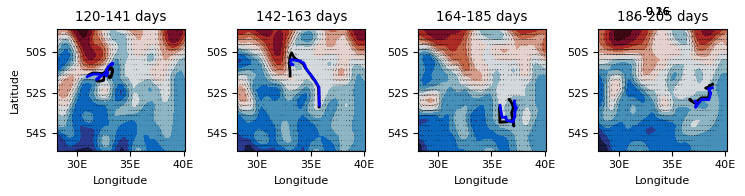

In [6]:
plt.figure(figsize=(7.5, 2))

plt.subplot(141)
ds_SSH.adt.isel(time=slice(0, 21)).mean('time').plot.contourf(levels=np.linspace(-1.2,0, 13), cmap=cmo.balance,
                                                             add_colorbar=False)
ds_SSH.isel(time=slice(0, 21)).mean('time').plot.quiver(x='longitude', y='latitude', u='ugos', v='vgos')

plt.plot(ds_660_time.sel(days=slice(120,142)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_660_time.sel(days=slice(120,142)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='k')
plt.plot(ds_659_time.sel(days=slice(120,142)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_659_time.sel(days=slice(120,142)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='b')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('120-141 days')
plt.xticks([30, 35, 40], labels=['30E', '35E', '40E'])
plt.yticks([-54, -52, -50], labels=['54S', '52S', '50S'])

plt.subplot(142)
ds_SSH.adt.isel(time=slice(21, 43)).mean('time').plot.contourf(levels=np.linspace(-1.2,0, 13), cmap=cmo.balance,
                                                             add_colorbar=False)
ds_SSH.isel(time=slice(21, 43)).mean('time').plot.quiver(x='longitude', y='latitude', u='ugos', v='vgos')

plt.plot(ds_660_time.sel(days=slice(142,164)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_660_time.sel(days=slice(142,164)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='k')
plt.plot(ds_659_time.sel(days=slice(142,164)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_659_time.sel(days=slice(142,164)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='b')
plt.xlabel('Longitude')
plt.ylabel('')
plt.title('142-163 days')
plt.xticks([30, 35, 40], labels=['30E', '35E', '40E'])
plt.yticks([-54, -52, -50], labels=['54S', '52S', '50S'])

plt.subplot(143)
ds_SSH.adt.isel(time=slice(43, 65)).mean('time').plot.contourf(levels=np.linspace(-1.2,0, 13), cmap=cmo.balance,
                                                             add_colorbar=False)
ds_SSH.isel(time=slice(43, 65)).mean('time').plot.quiver(x='longitude', y='latitude', u='ugos', v='vgos')

plt.plot(ds_660_time.sel(days=slice(164,186)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_660_time.sel(days=slice(164,186)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='k')
plt.plot(ds_659_time.sel(days=slice(164,186)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_659_time.sel(days=slice(164,186)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='b')
plt.xlabel('Longitude')
plt.ylabel('')
plt.title('164-185 days')
plt.xticks([30, 35, 40], labels=['30E', '35E', '40E'])
plt.yticks([-54, -52, -50], labels=['54S', '52S', '50S'])

plt.subplot(144)
ds_SSH.adt.isel(time=slice(65, 88)).mean('time').plot.contourf(levels=np.linspace(-1.2,0, 13), cmap=cmo.balance,
                                                             add_colorbar=False)#, cbar_kwargs={'label': 'SSH [m]'})
ds_SSH.isel(time=slice(65, 88)).mean('time').plot.quiver(x='longitude', y='latitude', u='ugos', v='vgos')

plt.plot(ds_660_time.sel(days=slice(186,206)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_660_time.sel(days=slice(186,206)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='k')
plt.plot(ds_659_time.sel(days=slice(186,206)).sel(ctd_pressure=200, method='nearest').longitude,
         ds_659_time.sel(days=slice(186,206)).sel(ctd_pressure=200, method='nearest').latitude,
        linewidth=2, color='b')
plt.xlabel('Longitude')
plt.ylabel('')
plt.title('186-205 days')
plt.xticks([30, 35, 40], labels=['30E', '35E', '40E'])
plt.yticks([-54, -52, -50], labels=['54S', '52S', '50S'])

plt.tight_layout()

#plt.savefig('figures/figure_SSH_panel0.pdf')

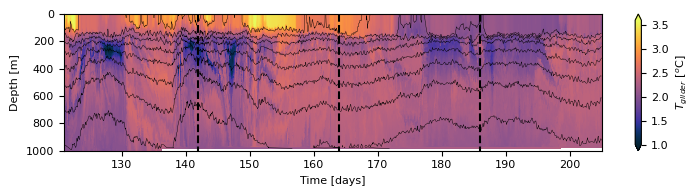

In [7]:
plt.figure(figsize=(7.5, 2))
ds_659_time.CT.plot(cmap=cmo.thermal, rasterized=True, cbar_kwargs={'label': '$T_{glider}$ [$^o$C]'}, vmin=1., vmax=3.6)
ds_659_time.sigma0.plot.contour(levels=np.linspace(27.0, 27.9,10), colors='k', linewidths=0.3)
plt.gca().invert_yaxis()

plt.vlines([142, 164, 186], 0, 1000, linestyles='--', colors='k')
#plt.xticks([0, 4e5, 8e5, 12e5, 16e5], labels=[0, 400, 800, 1200, 1600])
plt.xlabel('Time [days]')
plt.ylabel('Depth [m]')

plt.tight_layout()
#plt.savefig('figures/figure_SSH_panel1.pdf')

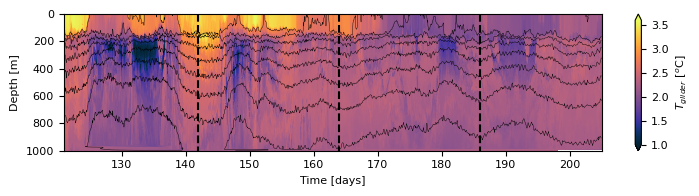

In [8]:
plt.figure(figsize=(7.5,2))
ds_660_time.CT.plot(cmap=cmo.thermal, rasterized=True, cbar_kwargs={'label': '$T_{glider}$ [$^o$C]'}, vmin=1., vmax=3.6)
ds_660_time.sigma0.plot.contour(levels=np.linspace(27.0, 27.9,10), colors='k', linewidths=0.3)
plt.gca().invert_yaxis()

plt.vlines([142, 164, 186], 0, 1000, linestyles='--', colors='k')
#plt.xticks([0, 4e5, 8e5, 12e5, 16e5], labels=[0, 400, 800, 1200, 1600])
plt.xlabel('Time [days]')
plt.ylabel('Depth [m]')

plt.tight_layout()

#plt.savefig('figures/figure_SSH_panel2.pdf')

In [ ]:
### T-S plots 

In [34]:
data_SA = np.append(ds_659_z.SA.values.reshape(-1), ds_660_z.SA.values.reshape(-1))
data_CT = np.append(ds_659_z.CT.values.reshape(-1), ds_660_z.CT.values.reshape(-1))

data_SA.shape

(480000,)

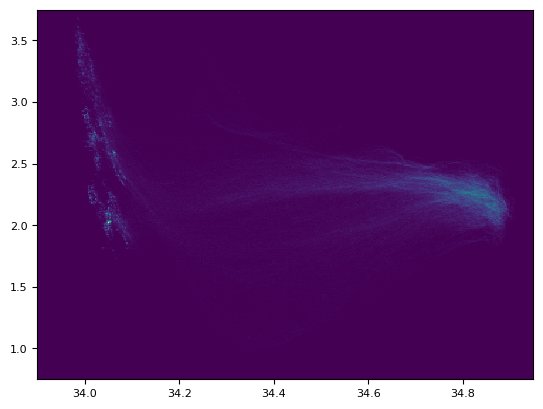

In [69]:
SA_bins = np.linspace(33.9, 34.95, 351)
CT_bins = np.linspace(0.75,3.75, 351)

h,x,y,_ = plt.hist2d(data_SA, data_CT,
           bins = [SA_bins, CT_bins], 
          density=True, ) ;

In [70]:
SA_mesh, CT_mesh = np.meshgrid(SA_bins, CT_bins)

rho_mesh = gsw.sigma0(SA_mesh, CT_mesh)

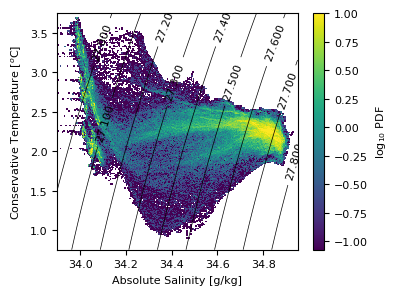

In [87]:
plt.figure(figsize=(4.,3))

plt.pcolormesh(x,y,np.log10(h).T, vmax=1.)
plt.colorbar(label='log$_{10}$ PDF')
plt.xlabel('Absolute Salinity [g/kg]')
plt.ylabel('Conservative Temperature [$^o$C]')

cnt = plt.contour(SA_mesh, CT_mesh, rho_mesh, levels= np.linspace(27.0, 27.9,10), colors='k', linewidths=.5)

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
#cnt.levels = [str(nf(val)) for val in cnt.levels] 

plt.clabel(cnt, cnt.levels, inline=True,   fontsize=8)

plt.tight_layout()
plt.savefig('./figures/T-S_diagram.png', dpi=300)

In [20]:
### climatology plots 

In [21]:
ds_clim = xr.open_dataset('../data/RG_clim_SOGOS.nc')

In [23]:
data_659 = data_dir+'sg_659_iso_grid.nc'
data_660 = data_dir+'sg_660_iso_grid.nc'

ds_659_iso = xr.load_dataset(data_659)
ds_660_iso = xr.load_dataset(data_660)

In [58]:
sigma_sel = 27.5 

ds_659_iso_sel = ds_659_iso.sel(rho_grid=sigma_sel)
ds_660_iso_sel = ds_660_iso.sel(rho_grid=sigma_sel)

clim_T_iso_sel = ds_clim.iso_CT.sel(iso_SIGMA0=sigma_sel, method='nearest')

In [59]:
def compute_clim_T (ds):

    D = len(ds.dives)
    clim_glid = np.zeros((D,))

    for i in range(D):

        if ~np.isnan(ds.longitude[i]):
            clim_glid[i] = clim_T_iso_sel.interp(LATITUDE = ds.latitude[i], LONGITUDE= ds.longitude[i])
        else:
            clim_glid[i] = np.nan
            
    return clim_glid

In [60]:
ds_659_iso_sel['clim_CT'] = xr.DataArray(compute_clim_T(ds_659_iso_sel), dims='dives')
ds_660_iso_sel['clim_CT'] = xr.DataArray(compute_clim_T(ds_660_iso_sel), dims = 'dives')

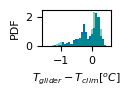

In [182]:
plt.figure(figsize=(7.5/6,2/2))

bins = np.linspace(-1.5, .5, 31)
(ds_659_iso_sel['CT'] - ds_659_iso_sel['clim_CT'] ).plot.hist(bins = bins, density=True)
(ds_660_iso_sel['CT'] - ds_660_iso_sel['clim_CT'] ).plot.hist(bins = bins, density=True, alpha=0.5)

#plt.(r'$T [^oC]$')
plt.title('')
plt.ylabel('PDF')
plt.xlabel(r'$T_{glider} - T_{clim} [^oC]$')

plt.tight_layout()

plt.savefig('figures/CT_sigma27_5_inset.pdf')

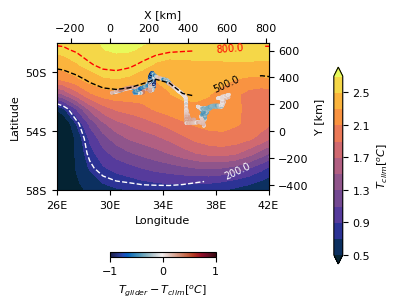

In [204]:
sigma_sel = 27.5 

fig, ax = plt.subplots(figsize=(7.5/1.8,3.))

#plt.figure(figsize=(5,3.2))
ds_clim.iso_CT.sel(iso_SIGMA0=sigma_sel, method='nearest').plot.contourf(levels=np.linspace(0.5,2.7, 12),
                                                                        cmap=cmocean.cm.thermal,
                                                                         add_colorbar=True,
                                                                        cbar_kwargs={'label':r'$T_{clim} [^oC]$', 
                                                                                     'shrink': 0.8,
                                                                                     'pad':.2})
plt.scatter(ds_659_iso_sel.longitude, ds_659_iso_sel.latitude,
           c = ds_659_iso_sel.CT - ds_659_iso_sel.clim_CT, s=2, cmap=cmocean.cm.balance, 
           vmin=-1, vmax=1, )
plt.scatter(ds_660_iso_sel.longitude, ds_660_iso_sel.latitude,
           c = ds_660_iso_sel.CT - ds_660_iso_sel.clim_CT, s=2, cmap=cmocean.cm.balance, 
           vmin=-1, vmax=1)

h = plt.colorbar(label=r'$T_{glider} - T_{clim} [^oC]$',  shrink=0.5, pad =0.25, orientation='horizontal')


CS = ds_clim.iso_PRESSURE.sel(iso_SIGMA0=sigma_sel, method='nearest').plot.contour(
                                                                    levels=[200, 500, 800], 
                                                                colors=['w','k','r'], linestyles='--',
                                                                        linewidths=1)

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
CS.levels = [str(nf(val)) for val in CS.levels] 
manual_locations = [(39,-56), (39,-51), (39,-47.5)]
plt.clabel(CS, CS.levels, inline=True,   fontsize=7, manual=manual_locations, fmt=['200', '500', '800'])


plt.tight_layout()

#plt.title('$\sigma$ = ' + str(sigma_sel) + ' $kg/m^{3}$')
plt.title('')

plt.yticks([-58, -54, -50, -46], labels=['58S', '54S', '50S', '46S'])
plt.xticks([26, 30, 34, 38, 42], labels=['26E', '30E', '34E', '38E', '42E'])

plt.xlim([26, 42])
plt.ylim([-58, -48])

plt.xlabel('Longitude')
#plt.xlabel('')
plt.ylabel('Latitude')


def forward_2nd_xaxis(x):
    return (x-30)*110*np.cos(np.pi/180*-52)
    #great_circle_distance(30, -54, x, -52)
    
def inverse_2nd_xaxis(x):
    return (x)/110/np.cos(np.pi/180*-52) + 30

def forward_2nd_yaxis(x):
    return (x+54)*110
    #great_circle_distance(30, -54, x, -52)
    
def inverse_2nd_yaxis(x):
    return (x)/110 - 54


secxax = ax.secondary_xaxis('top', 
            functions=(forward_2nd_xaxis, inverse_2nd_xaxis))
secxax.set_xlabel('X [km]')

secyax = ax.secondary_yaxis('right', 
            functions=(forward_2nd_yaxis, inverse_2nd_yaxis))
secyax.set_ylabel('Y [km]')

plt.savefig('figures/CT_sigma27_5.pdf')

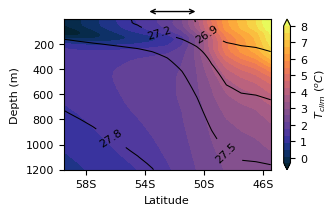

In [205]:
plt.figure(figsize=(7.5/2.2, 2.2))
im = ds_clim.CT.sel(LONGITUDE=30, method='nearest').plot.contourf(levels=np.linspace(-0.3,8,21), cmap=cmocean.cm.thermal,
                                            add_colorbar=False
                                            )                                             

cbar = plt.colorbar(im, ticks= [0, 1,2,3,4,5,6,7, 8])
plt.xticks([-58, -54, -50, -46], labels=['58S', '54S', '50S', '46S'])
#plt.xtick_labels(['58S', '54S', '50S', '46S'])

cbar.ax.set_ylabel(r' $T_{clim}$ ($^oC$)')
plt.gca().invert_yaxis()
CS = ds_clim.SIGMA0.sel(LONGITUDE=30, method='nearest').plot.contour(levels=[26.9,27.2, 27.5, 27.8], linewidths=.75,
                                       colors='k')

#ds_clim.SIGMA0.sel(LONGITUDE=30, method='nearest').plot.contour(levels=[sigma_sel], linewidths=.75,
#                                       colors='k', linestyles='--')
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
CS.levels = [str(nf(val)) for val in CS.levels] 
plt.clabel(CS, CS.levels, inline=True,   fontsize=8)
plt.gca().invert_yaxis()

plt.annotate('', xy=(0.4, 1.05), xycoords='axes fraction', xytext=(.65, 1.05), 
            arrowprops=dict(arrowstyle="<->", color='k'))

plt.ylabel('Depth (m)')
plt.xlabel('Latitude')
plt.title('')
plt.tight_layout()
plt.savefig('figures/CT_clim.pdf')

We combined all the above panels together using inkscape (a figure editing software) to produce figure 1. 